In [19]:
pip install holidays-es

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from math import pi, sin, cos
from datetime import datetime
from holidays_es import get_provinces, Province
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import layers
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import mlflow

In [22]:
df = pd.read_csv('station_1.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          25862 non-null  int64  
 1   activate            25862 non-null  int64  
 2   name                25862 non-null  object 
 3   reservations_count  25862 non-null  int64  
 4   light               25862 non-null  int64  
 5   total_bases         25862 non-null  int64  
 6   free_bases          25862 non-null  int64  
 7   number              25862 non-null  object 
 8   longitude           25862 non-null  float64
 9   no_available        25862 non-null  int64  
 10  address             25862 non-null  object 
 11  latitude            25862 non-null  float64
 12  dock_bikes          25862 non-null  int64  
 13  id                  25862 non-null  object 
 14  time                25862 non-null  int64  
 15  date                25862 non-null  object 
 16  holi

In [24]:
df

,Unnamed: 0,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,...,weather_main,weekday,year,month,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,0,1,Puerta del Sol A,0,2,24,11,1a,-3.702425,0,...,Clear,2,2018,8,0.000000,1.000000,0.974928,-0.222521,1.0,6.123234e-17
1,1,1,Puerta del Sol A,0,0,24,18,1a,-3.702425,0,...,Clear,2,2018,8,0.258819,0.965926,0.974928,-0.222521,1.0,6.123234e-17
2,2,1,Puerta del Sol A,0,2,24,13,1a,-3.702425,0,...,Clear,2,2018,8,0.500000,0.866025,0.974928,-0.222521,1.0,6.123234e-17
3,3,1,Puerta del Sol A,0,0,24,17,1a,-3.702425,0,...,Clear,2,2018,8,0.707107,0.707107,0.974928,-0.222521,1.0,6.123234e-17
4,4,1,Puerta del Sol A,0,0,24,22,1a,-3.702425,0,...,Clear,2,2018,8,0.866025,0.500000,0.974928,-0.222521,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25857,708,1,Puerta del Sol A,1,0,30,21,1a,-3.701834,0,...,Clear,2,2021,6,-0.965926,0.258819,0.974928,-0.222521,0.5,8.660254e-01
25858,709,1,Puerta del Sol A,0,0,30,22,1a,-3.701834,0,...,Clear,2,2021,6,-0.866025,0.500000,0.974928,-0.222521,0.5,8.660254e-01
25859,710,1,Puerta del Sol A,0,0,30,21,1a,-3.701834,0,...,Clear,2,2021,6,-0.707107,0.707107,0.974928,-0.222521,0.5,8.660254e-01
25860,711,1,Puerta del Sol A,0,0,30,24,1a,-3.701834,0,...,Clear,2,2021,6,-0.500000,0.866025,0.974928,-0.222521,0.5,8.660254e-01


In [25]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [26]:
df.year.unique()

array([2018, 2019, 2020, 2021])

In [27]:
temp = df.copy()

In [28]:
# Create correlation matrix
#corr_matrix = temp.corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [29]:
#to_drop 

In [30]:
#temp_2=temp[to_drop]

In [31]:
#corr_matrix = temp_2.corr().abs()

In [32]:
#corr_mat = temp.corr()

In [33]:
#sorted_mat = corr_mat.unstack().sort_values()

In [34]:
#sorted_corr = pd.DataFrame(sorted_mat)

In [35]:
#sorted_corr

In [36]:
#sns.heatmap(corr_matrix)

In [37]:
temp.shape

(25862, 28)

In [38]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   activate            25862 non-null  int64  
 1   name                25862 non-null  object 
 2   reservations_count  25862 non-null  int64  
 3   light               25862 non-null  int64  
 4   total_bases         25862 non-null  int64  
 5   free_bases          25862 non-null  int64  
 6   number              25862 non-null  object 
 7   longitude           25862 non-null  float64
 8   no_available        25862 non-null  int64  
 9   address             25862 non-null  object 
 10  latitude            25862 non-null  float64
 11  dock_bikes          25862 non-null  int64  
 12  id                  25862 non-null  object 
 13  time                25862 non-null  int64  
 14  date                25862 non-null  object 
 15  holidays            25862 non-null  bool   
 16  date

In [39]:
#test=temp['datetime'][0]

In [40]:
#test[0:10]+' '+test[10:]

In [41]:
#temp['datetime']

In [42]:
#pd.to_datetime(temp['datetime'], format='%Y-%m-%d %H:%M:%S',)

### Scaling and Encoding :

In [43]:
temp.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,...,weather_main,weekday,year,month,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,1,Puerta del Sol A,0,2,24,11,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.000000,1.000000,0.974928,-0.222521,1.0,6.123234e-17
1,1,Puerta del Sol A,0,0,24,18,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.258819,0.965926,0.974928,-0.222521,1.0,6.123234e-17
2,1,Puerta del Sol A,0,2,24,13,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.500000,0.866025,0.974928,-0.222521,1.0,6.123234e-17
3,1,Puerta del Sol A,0,0,24,17,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.707107,0.707107,0.974928,-0.222521,1.0,6.123234e-17
4,1,Puerta del Sol A,0,0,24,22,1a,-3.702425,0,Puerta del Sol n 1,...,Clear,2,2018,8,0.866025,0.500000,0.974928,-0.222521,1.0,6.123234e-17


In [44]:
temp.name.unique()

array(['Puerta del Sol A', 'Madrid Sol 1A'], dtype=object)

In [45]:
temp.select_dtypes(['int', 'float']).columns

Index(['activate', 'reservations_count', 'light', 'total_bases', 'free_bases',
       'longitude', 'no_available', 'latitude', 'dock_bikes', 'time',
       'feels_like', 'weekday', 'year', 'month', 'hour_sin', 'hour_cos',
       'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [46]:
temp.number.unique()

array(['1a'], dtype=object)

In [47]:
temp.longitude.unique()

array([-3.7024255 , -3.70178074, -3.7018341 ])

In [48]:
temp.latitude.unique()

array([40.4168961 , 40.41715281, 40.4172137 ])

In [49]:
from sklearn.preprocessing import StandardScaler

f_transformer = StandardScaler()

temp[['activate', 'reservations_count', 'light', 'total_bases', 'free_bases', 'longitude', 'no_available', 'latitude', 'time',
       'feels_like', 'hour_sin', 'hour_cos','weekday_sin', 'weekday_cos', 'month_sin', 
      'month_cos']] = f_transformer.fit_transform(temp[['activate', 'reservations_count', 'light', 'total_bases', 'free_bases', 'longitude', 'no_available', 'latitude', 'time',
       'feels_like', 'hour_sin', 'hour_cos',
        'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']])


In [50]:
temp.columns

Index(['activate', 'name', 'reservations_count', 'light', 'total_bases',
       'free_bases', 'number', 'longitude', 'no_available', 'address',
       'latitude', 'dock_bikes', 'id', 'time', 'date', 'holidays', 'datetime',
       'feels_like', 'weather_main', 'weekday', 'year', 'month', 'hour_sin',
       'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [51]:
temp.holidays = temp.holidays.astype('int')

In [52]:
temp_small = temp.drop(columns=[])

In [53]:
temp_model = temp.drop(columns=['name', 'number', 'address', 'id'])

In [54]:
temp_model.head()

,activate,reservations_count,light,total_bases,free_bases,longitude,no_available,latitude,dock_bikes,time,...,weather_main,weekday,year,month,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos
0,0.0,-0.218666,0.704880,-1.090797,-0.245789,-1.083199,-0.352407,-1.074382,11,-1.659847,...,Clear,2,2018,8,-0.001459,1.413281,1.379811,-0.315715,1.4689,0.031981
1,0.0,-0.218666,-1.195028,-1.090797,0.603942,-1.083199,-0.352407,-1.074382,4,-1.515481,...,Clear,2,2018,8,0.364336,1.365063,1.379811,-0.315715,1.4689,0.031981
2,0.0,-0.218666,0.704880,-1.090797,-0.003009,-1.083199,-0.352407,-1.074382,10,-1.371115,...,Clear,2,2018,8,0.705203,1.223693,1.379811,-0.315715,1.4689,0.031981
3,0.0,-0.218666,-1.195028,-1.090797,0.482552,-1.083199,-0.352407,-1.074382,4,-1.226749,...,Clear,2,2018,8,0.997912,0.998806,1.379811,-0.315715,1.4689,0.031981
4,0.0,-0.218666,-1.195028,-1.090797,1.089502,-1.083199,-0.352407,-1.074382,0,-1.082383,...,Clear,2,2018,8,1.222516,0.705727,1.379811,-0.315715,1.4689,0.031981


In [55]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_features = ['year', 'month', 'weekday', 'weather_main']
transformed_data = pd.DataFrame(ohe.fit_transform(temp_model[categorical_features]))
transformed_data.columns = ohe.get_feature_names(categorical_features)
concatenated_data = pd.concat([temp_model, transformed_data], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
# ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# categorical_features = ['year', 'month', 'weekday', 'weather_main']
# ohe.fit(temp_model[categorical_features])

In [57]:
# encoded = ohe.transform(temp_model[categorical_features])

In [58]:
# temp_model['year'], temp_model['month'], temp_model['weekday'], temp_model['weather_main'] = encoded.T

In [59]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activate                   25862 non-null  float64
 1   reservations_count         25862 non-null  float64
 2   light                      25862 non-null  float64
 3   total_bases                25862 non-null  float64
 4   free_bases                 25862 non-null  float64
 5   longitude                  25862 non-null  float64
 6   no_available               25862 non-null  float64
 7   latitude                   25862 non-null  float64
 8   dock_bikes                 25862 non-null  int64  
 9   time                       25862 non-null  float64
 10  date                       25862 non-null  object 
 11  holidays                   25862 non-null  int64  
 12  datetime                   25862 non-null  object 
 13  feels_like                 25862 non-null  flo

In [60]:
temp_model = concatenated_data.drop(columns=['year', 'month', 'weekday', 'weather_main','date'])

In [61]:
temp_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25862 entries, 0 to 25861
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activate                   25862 non-null  float64
 1   reservations_count         25862 non-null  float64
 2   light                      25862 non-null  float64
 3   total_bases                25862 non-null  float64
 4   free_bases                 25862 non-null  float64
 5   longitude                  25862 non-null  float64
 6   no_available               25862 non-null  float64
 7   latitude                   25862 non-null  float64
 8   dock_bikes                 25862 non-null  int64  
 9   time                       25862 non-null  float64
 10  holidays                   25862 non-null  int64  
 11  datetime                   25862 non-null  object 
 12  feels_like                 25862 non-null  float64
 13  hour_sin                   25862 non-null  flo

In [62]:
temp_model['datetime'] = temp_model['datetime'].apply(lambda x: x[0:10]+' '+x[10:]+':00')

In [63]:
temp_model['datetime']=pd.to_datetime(temp_model['datetime'], format='%Y-%m-%d %H:%M:%S')

In [64]:
temp_model = temp_model.set_index('datetime')

In [65]:
temp_model.sort_values(by='datetime')

,activate,reservations_count,light,total_bases,free_bases,longitude,no_available,latitude,dock_bikes,time,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,0.0,-0.218666,0.704880,-1.090797,-0.245789,-1.083199,-0.352407,-1.074382,11,-1.659847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 01:00:00,0.0,-0.218666,-1.195028,-1.090797,0.603942,-1.083199,-0.352407,-1.074382,4,-1.515481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 02:00:00,0.0,-0.218666,0.704880,-1.090797,-0.003009,-1.083199,-0.352407,-1.074382,10,-1.371115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 03:00:00,0.0,-0.218666,-1.195028,-1.090797,0.482552,-1.083199,-0.352407,-1.074382,4,-1.226749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 04:00:00,0.0,-0.218666,-1.195028,-1.090797,1.089502,-1.083199,-0.352407,-1.074382,0,-1.082383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,0.0,3.789224,-1.195028,0.916760,0.968112,0.861520,-0.352407,1.047365,3,1.083109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30 20:00:00,0.0,-0.218666,-1.195028,0.916760,1.089502,0.861520,-0.352407,1.047365,3,1.227475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30 21:00:00,0.0,-0.218666,-1.195028,0.916760,0.968112,0.861520,-0.352407,1.047365,4,1.371841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
temp_model

,activate,reservations_count,light,total_bases,free_bases,longitude,no_available,latitude,dock_bikes,time,...,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,0.0,-0.218666,0.704880,-1.090797,-0.245789,-1.083199,-0.352407,-1.074382,11,-1.659847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 01:00:00,0.0,-0.218666,-1.195028,-1.090797,0.603942,-1.083199,-0.352407,-1.074382,4,-1.515481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 02:00:00,0.0,-0.218666,0.704880,-1.090797,-0.003009,-1.083199,-0.352407,-1.074382,10,-1.371115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 03:00:00,0.0,-0.218666,-1.195028,-1.090797,0.482552,-1.083199,-0.352407,-1.074382,4,-1.226749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-01 04:00:00,0.0,-0.218666,-1.195028,-1.090797,1.089502,-1.083199,-0.352407,-1.074382,0,-1.082383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,0.0,3.789224,-1.195028,0.916760,0.968112,0.861520,-0.352407,1.047365,3,1.083109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30 20:00:00,0.0,-0.218666,-1.195028,0.916760,1.089502,0.861520,-0.352407,1.047365,3,1.227475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-30 21:00:00,0.0,-0.218666,-1.195028,0.916760,0.968112,0.861520,-0.352407,1.047365,4,1.371841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating Time steps

In [67]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [68]:
train_size = int(len(temp_model) * 0.8)
test_size = len(temp_model) - train_size
train, test = temp_model.iloc[0:train_size], temp_model.iloc[train_size:len(temp_model)]
print(len(train), len(test))

20689 5173


In [69]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.dock_bikes, time_steps)
X_test, y_test = create_dataset(test, test.dock_bikes, time_steps)

print(X_train.shape, y_train.shape)

(20665, 24, 52) (20665,)


Model 1: 

In [ ]:
mlflow.set_tracking_uri("https://mlflow.lewagon.ai")
mlflow.set_experiment(experiment_name="BiciMad")

<Experiment: artifact_location='mlflow-artifacts:/6429', experiment_id='6429', lifecycle_stage='active', name='BiciMad', tags={}>

In [70]:
model = Sequential()
model.add(
    layers.Bidirectional(
    layers.LSTM(
      units=100,
      input_shape=(X_train.shape[1], X_train.shape[2]),
    ), 
  )
)
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 10)

In [ ]:
batch_size = 64
epochs = 20

history = model.fit(
    X_train, y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

Epoch 1/20
647/647 [==============================] - 15s 10ms/step - loss: 12.5261 - val_loss: 3.0626
Epoch 2/20
647/647 [==============================] - 5s 8ms/step - loss: 6.8701 - val_loss: 3.2962
Epoch 3/20
647/647 [==============================] - 5s 8ms/step - loss: 6.5360 - val_loss: 3.1788
Epoch 4/20
647/647 [==============================] - 5s 8ms/step - loss: 6.2723 - val_loss: 2.9640
Epoch 5/20
647/647 [==============================] - 6s 9ms/step - loss: 6.1439 - val_loss: 2.8607
Epoch 6/20
647/647 [==============================] - 7s 11ms/step - loss: 6.0598 - val_loss: 2.9017
Epoch 7/20
647/647 [==============================] - 6s 9ms/step - loss: 5.9106 - val_loss: 2.8478
Epoch 8/20
647/647 [==============================] - 5s 8ms/step - loss: 5.8281 - val_loss: 3.0092
Epoch 9/20
647/647 [==============================] - 5s 8ms/step - loss: 5.7292 - val_loss: 2.8612
Epoch 10/20
647/647 [==============================] - 5s 8ms/step - loss: 5.6491 - val_loss: 2.

In [ ]:
min(history.history['loss'])

6.711449146270752

In [ ]:
with mlflow.start_run():

    params = dict(batch_size=batch_size, epochs=epochs)
    metrics = dict(loss=min(history.history['loss']))

    mlflow.log_params(params)
    mlflow.log_metrics(metrics)

    mlflow.keras.log_model(keras_model=model,
                           artifact_path="model",
                           keras_module="tensorflow.keras",
                           registered_model_name="bicimad_model1_ALLDATA_Bidirectional_LSTM100_Drop_Dense")

2022/08/31 17:49:20 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 17:49:32 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 17:49:32 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.14+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). ML

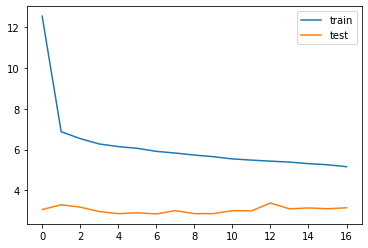

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

Model 2:

In [ ]:
model = Sequential()

model.add(layers.Bidirectional(layers.LSTM(units=128,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(layers.LSTM(units= 128, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units= 128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 15)

In [ ]:
batch_size = 124
epochs = 30

history = model.fit(
    X_train, y_train, 
    epochs=batch_size, 
    batch_size=epochs, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

Epoch 1/124
1380/1380 [==============================] - 25s 13ms/step - loss: 9.8158 - acc: 0.1343 - val_loss: 3.3573 - val_acc: 0.1999
Epoch 2/124
1380/1380 [==============================] - 17s 13ms/step - loss: 6.8637 - acc: 0.1494 - val_loss: 3.4469 - val_acc: 0.1983
Epoch 3/124
1380/1380 [==============================] - 17s 13ms/step - loss: 6.4835 - acc: 0.1572 - val_loss: 3.3548 - val_acc: 0.2149
Epoch 4/124
1380/1380 [==============================] - 18s 13ms/step - loss: 6.3618 - acc: 0.1593 - val_loss: 3.1000 - val_acc: 0.2162
Epoch 5/124
1380/1380 [==============================] - 17s 13ms/step - loss: 6.1413 - acc: 0.1608 - val_loss: 3.1320 - val_acc: 0.2185
Epoch 6/124
1380/1380 [==============================] - 17s 12ms/step - loss: 6.0802 - acc: 0.1617 - val_loss: 2.9661 - val_acc: 0.2112
Epoch 7/124
1380/1380 [==============================] - 17s 13ms/step - loss: 5.9275 - acc: 0.1598 - val_loss: 2.8891 - val_acc: 0.2159
Epoch 8/124
1380/1380 [==================

In [ ]:
from keras.metrics import accuracy
with mlflow.start_run():

    params = dict(batch_size=batch_size, epochs=epochs)
    metrics = dict(loss=min(history.history['loss']), accuracy=max(history.history['acc']))

    mlflow.log_params(params)
    mlflow.log_metrics(metrics)

    mlflow.keras.log_model(keras_model=model,
                           artifact_path="model",
                           keras_module="tensorflow.keras",
                           registered_model_name="bicimad_model2_ALLDATA_Bidirectional_LSTM128_LSTM128_Drop_LSTM128_Drop_Dense")

2022/08/31 17:59:06 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 17:59:20 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 17:59:20 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.14+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). ML

In [ ]:
## MODEL 3

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# adding second RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh",return_sequences = True))
regressor.add(Dropout(0.2))

# adding third RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# adding fourth RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"]) #rmspr


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 15)

In [ ]:
batch_size= 124
epochs=30
history = regressor.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), shuffle=False, callbacks = [early_stop])

Epoch 1/30
334/334 [==============================] - 33s 91ms/step - loss: 30.7136 - accuracy: 0.1181 - val_loss: 3.8490 - val_accuracy: 0.1844
Epoch 2/30
334/334 [==============================] - 30s 91ms/step - loss: 12.8714 - accuracy: 0.1262 - val_loss: 4.8852 - val_accuracy: 0.1838
Epoch 3/30
334/334 [==============================] - 31s 94ms/step - loss: 10.7582 - accuracy: 0.1218 - val_loss: 4.3635 - val_accuracy: 0.1830
Epoch 4/30
334/334 [==============================] - 29s 88ms/step - loss: 10.0002 - accuracy: 0.1223 - val_loss: 6.4167 - val_accuracy: 0.1814
Epoch 5/30
334/334 [==============================] - 30s 89ms/step - loss: 9.6522 - accuracy: 0.1227 - val_loss: 4.9744 - val_accuracy: 0.1813
Epoch 6/30
334/334 [==============================] - 30s 89ms/step - loss: 9.4622 - accuracy: 0.1245 - val_loss: 3.3950 - val_accuracy: 0.1761
Epoch 7/30
334/334 [==============================] - 32s 96ms/step - loss: 9.3466 - accuracy: 0.1213 - val_loss: 3.4262 - val_accur

KeyboardInterrupt: ignored

In [ ]:
with mlflow.start_run():

    params = dict(batch_size=batch_size, epochs=epochs)
    metrics = dict(loss=min(history.history['loss']), accuracy=max(history.history['accuracy']))

    mlflow.log_params(params)
    mlflow.log_metrics(metrics)

    mlflow.keras.log_model(keras_model=regressor,
                           artifact_path="model",
                           keras_module="tensorflow.keras",
                           registered_model_name="bicimad_model3_Thierry_SimpleRNN50_Drop_SimpleRNN50_Drop_SimpleRNN50_Drop_tanh.all_SimpleRNN50_Drop_Dense")

2022/08/31 15:06:30 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 15:06:36 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 15:06:36 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.14+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). ML

In [ ]:
### MODEL 4

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.optimizers import RMSprop


def create_model(X_train, y_train):
    
    
    print(X_train.shape)
    print(y_train.shape)
    
    #tf.random.set_seed(30)
    normalizer = Normalization() # Instantiate a "normalizer" layer
    normalizer.adapt(X_train) # "Fit" it on the train set
    model = Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(25, return_sequences=False, input_shape=(X_train.shape[1],X_train.shape[2])))

    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(y_train.shape[-1], activation='linear'))
    model.compile(loss='mse',optimizer=RMSprop(learning_rate=0.01), metrics=['mae', 'mape'])
    print(model.summary())
    print(X_train.shape)

    return model


In [ ]:
model = create_model(X_train, y_train)

(41397, 24, 52)
(41397,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, None, 52)         105       
 n)                                                              
                                                                 
 lstm_4 (LSTM)               (None, 25)                7800      
                                                                 
 dropout_7 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 15)                390       
                                                                 
 dropout_8 (Dropout)         (None, 15)                0         
                                                                 
 dense_4 (Dense)             (None, 41397)             662352    
                             

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 10)

In [ ]:
batch_size = 100
epochs = 20

history = model.fit(
    X_train, y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

Epoch 1/20
414/414 [==============================] - 6s 10ms/step - loss: 15.3948 - mae: 2.7868 - mape: 268126048.0000 - val_loss: 3.6146 - val_mae: 1.3889 - val_mape: 189569392.0000
Epoch 2/20
414/414 [==============================] - 3s 8ms/step - loss: 10.5636 - mae: 2.3375 - mape: 246379840.0000 - val_loss: 3.3753 - val_mae: 1.3365 - val_mape: 186625520.0000
Epoch 3/20
414/414 [==============================] - 3s 8ms/step - loss: 9.7731 - mae: 2.2908 - mape: 266324480.0000 - val_loss: 3.4864 - val_mae: 1.3911 - val_mape: 212873696.0000
Epoch 4/20
414/414 [==============================] - 4s 10ms/step - loss: 9.6048 - mae: 2.2758 - mape: 275603008.0000 - val_loss: 3.4626 - val_mae: 1.3942 - val_mape: 222267440.0000
Epoch 5/20
414/414 [==============================] - 4s 9ms/step - loss: 9.3519 - mae: 2.2458 - mape: 272484960.0000 - val_loss: 3.4802 - val_mae: 1.3936 - val_mape: 221189376.0000
Epoch 6/20
414/414 [==============================] - 4s 9ms/step - loss: 9.2488 - mae

In [ ]:
with mlflow.start_run():

    params = dict(batch_size=batch_size, epochs=epochs)
    metrics = dict(loss=min(history.history['loss']), accuracy=min(history.history['mae']))

    mlflow.log_params(params)
    mlflow.log_metrics(metrics)

    mlflow.keras.log_model(keras_model=model,
                           artifact_path="model",
                           keras_module="tensorflow.keras",
                           registered_model_name="bicimad_model4_Thierry_LSTM25_Drop_Dense15_Drop_Dense")

2022/08/31 15:15:39 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 15:15:44 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 15:15:44 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.14+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). ML

Model 5

In [ ]:
model = Sequential()
model.add(
    layers.Bidirectional(
    layers.LSTM(
      units=75,
      input_shape=(X_train.shape[1], X_train.shape[2]),
    ), 
  )
)
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", verbose=1, patience = 10)

In [ ]:
batch_size = 124
epochs = 35

history = model.fit(
    X_train, y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

Epoch 1/35
334/334 [==============================] - 31s 11ms/step - loss: 21.7559 - val_loss: 4.1245
Epoch 2/35
334/334 [==============================] - 3s 9ms/step - loss: 7.8488 - val_loss: 5.2139
Epoch 3/35
334/334 [==============================] - 3s 9ms/step - loss: 7.2521 - val_loss: 4.1773
Epoch 4/35
334/334 [==============================] - 3s 9ms/step - loss: 6.8220 - val_loss: 3.8563
Epoch 5/35
334/334 [==============================] - 3s 9ms/step - loss: 6.5783 - val_loss: 3.1690
Epoch 6/35
334/334 [==============================] - 3s 9ms/step - loss: 6.5566 - val_loss: 4.0877
Epoch 7/35
334/334 [==============================] - 3s 9ms/step - loss: 6.3657 - val_loss: 2.7335
Epoch 8/35
334/334 [==============================] - 3s 9ms/step - loss: 6.2056 - val_loss: 3.0586
Epoch 9/35
334/334 [==============================] - 3s 9ms/step - loss: 6.1318 - val_loss: 2.9861
Epoch 10/35
334/334 [==============================] - 3s 9ms/step - loss: 6.0594 - val_loss: 3.0

In [ ]:
with mlflow.start_run():

    params = dict(batch_size=batch_size, epochs=epochs)
    metrics = dict(loss=min(history.history['loss']))

    mlflow.log_params(params)
    mlflow.log_metrics(metrics)

    mlflow.keras.log_model(keras_model=model,
                           artifact_path="model",
                           keras_module="tensorflow.keras",
                           registered_model_name="bicimad_model5_Bidirectional_LSTM75_Drop_Dense")

2022/08/31 15:53:15 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 15:53:25 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 15:53:25 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.14+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). ML

In [ ]:
## MODEL 6

In [ ]:
model = Sequential()
model.add(
    layers.Bidirectional(
    layers.LSTM(
      units=50,
      input_shape=(X_train.shape[1], X_train.shape[2]),
    ), 
  )
)
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", verbose=1, patience = 10)

In [ ]:
batch_size = 64
epochs = 35

history = model.fit(
    X_train, y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

Epoch 1/35
323/323 [==============================] - 9s 19ms/step - loss: 27.7078 - val_loss: 13.9503
Epoch 2/35
323/323 [==============================] - 8s 23ms/step - loss: 10.0961 - val_loss: 8.6504
Epoch 3/35
323/323 [==============================] - 6s 17ms/step - loss: 8.6099 - val_loss: 6.5694
Epoch 4/35
323/323 [==============================] - 5s 17ms/step - loss: 8.3423 - val_loss: 5.7810
Epoch 5/35
323/323 [==============================] - 6s 20ms/step - loss: 8.0289 - val_loss: 5.6022
Epoch 6/35
323/323 [==============================] - 6s 18ms/step - loss: 7.9329 - val_loss: 5.5850
Epoch 7/35
323/323 [==============================] - 5s 16ms/step - loss: 7.8637 - val_loss: 5.4663
Epoch 8/35
323/323 [==============================] - 5s 16ms/step - loss: 7.6484 - val_loss: 5.4769
Epoch 9/35
323/323 [==============================] - 5s 17ms/step - loss: 7.5537 - val_loss: 5.3467
Epoch 10/35
323/323 [==============================] - 5s 17ms/step - loss: 7.4938 - val

In [ ]:
with mlflow.start_run():

    params = dict(batch_size=batch_size, epochs=epochs)
    metrics = dict(loss=min(history.history['loss']))

    mlflow.log_params(params)
    mlflow.log_metrics(metrics)

    mlflow.keras.log_model(keras_model=model,
                           artifact_path="model",
                           keras_module="tensorflow.keras",
                           registered_model_name="bicimad_model6_Bidirectional_LSTM50_Drop_Dense")

2022/08/31 15:57:10 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 15:57:18 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 15:57:18 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.14+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). ML

In [ ]:
### MODEL 7

In [ ]:
model = Sequential()

model.add(layers.Bidirectional(layers.LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(layers.LSTM(units= 100, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units= 75))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units = 1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 10)

In [ ]:
batch_size = 64
epochs = 30

history = model.fit(
    X_train, y_train, 
    epochs=batch_size, 
    batch_size=epochs, 
    validation_data=(X_test, y_test),
    shuffle=False,
    callbacks = [early_stop]
)

Epoch 1/64
689/689 [==============================] - 50s 64ms/step - loss: 15.6916 - acc: 0.1388 - val_loss: 8.3173 - val_acc: 0.0157
Epoch 2/64
689/689 [==============================] - 36s 52ms/step - loss: 8.7827 - acc: 0.1452 - val_loss: 6.1036 - val_acc: 0.0157
Epoch 3/64
689/689 [==============================] - 36s 52ms/step - loss: 8.2082 - acc: 0.1618 - val_loss: 5.4982 - val_acc: 0.0157
Epoch 4/64
689/689 [==============================] - 37s 54ms/step - loss: 8.0589 - acc: 0.1641 - val_loss: 5.4008 - val_acc: 0.0157
Epoch 5/64
689/689 [==============================] - 36s 52ms/step - loss: 7.9290 - acc: 0.1648 - val_loss: 5.5827 - val_acc: 0.0157
Epoch 6/64
689/689 [==============================] - 38s 55ms/step - loss: 7.8548 - acc: 0.1660 - val_loss: 5.5120 - val_acc: 0.0157
Epoch 7/64
689/689 [==============================] - 35s 51ms/step - loss: 7.7282 - acc: 0.1669 - val_loss: 5.7141 - val_acc: 0.0157
Epoch 8/64
689/689 [==============================] - 36s 52m

In [ ]:
from keras.metrics import accuracy
with mlflow.start_run():

    params = dict(batch_size=batch_size, epochs=epochs)
    metrics = dict(loss=min(history.history['loss']), accuracy=max(history.history['acc']))

    mlflow.log_params(params)
    mlflow.log_metrics(metrics)

    mlflow.keras.log_model(keras_model=model,
                           artifact_path="model",
                           keras_module="tensorflow.keras",
                           registered_model_name="bicimad_model7_Bidirectional_LSTM100_LSTM100_Drop_LSTM75_Drop_Dense")

2022/08/31 16:09:21 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 16:09:34 WARNING mlflow.utils.requirements_utils: Found tensorflow version (2.8.2+zzzcolab20220719082949) contains a local version label (+zzzcolab20220719082949). MLflow logged a pip requirement for this package as 'tensorflow==2.8.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2022/08/31 16:09:34 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.3.14+cuda11.cudnn805) contains a local version label (+cuda11.cudnn805). ML

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 5s 54ms/step


(array([  0.,   0.,   0.,   0.,   0., 127.,   0.,   0.,   0.,   0.]),
 array([ 9.688438,  9.788439,  9.888438,  9.988439, 10.088438, 10.188438,
        10.288439, 10.388438, 10.488439, 10.588438, 10.688438],
       dtype=float32),
 <BarContainer object of 10 artists>)

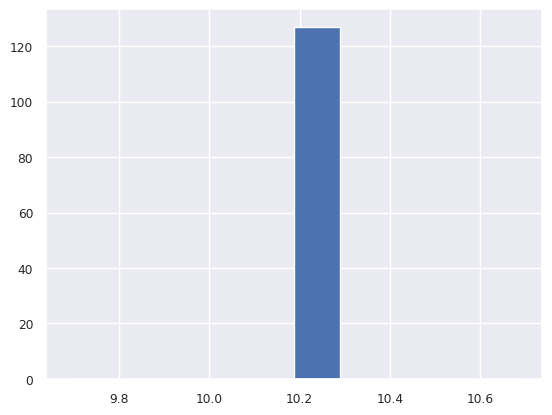

In [ ]:
plt.hist(y_pred)